# Data visualization

This script generates all kinds of figures and pre-processes the data to a very limited extent (binarization of very rare features).

## Data loading

### Dataset loading

In [126]:
import pandas as pd
import os
import matplotlib.pyplot as plt


data_file_name = "dataset_90_days_started_09_07_23"
data_path_format = '/workspaces/msc_thesis/data/final_data/{data_file_name}.csv'
data_path = data_path_format.format(data_file_name=data_file_name)
print(f'{data_path=}')


df: pd.DataFrame = pd.read_csv(filepath_or_buffer=data_path, header=0)

print(f'{len(df)=}.')
print(f'{len(df.columns)=}\n')
print(f'{df.columns=}')

df.describe()


data_path='/workspaces/msc_thesis/data/final_data/dataset_90_days_started_09_07_23.csv'


len(df)=1815972.
len(df.columns)=92

df.columns=Index(['ID', 'Project Name', 'Submitter ID', 'PR Number', 'Closed At',
       'PullRequestIsMerged', 'SubmitterIsFirstTimeContributor',
       'ControlIntegratedBySameUser', 'ControlPullRequestLifeTimeInMinutes',
       'ControlPullRequestHasComments', 'ControlNumberOfCommitsInPullRequest',
       'ControlPullRequestHasCommentByExternalUser',
       'ControlHasHashTagInDescription',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-Put)',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-Put)',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-In)',
       'FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-Put)',
       'FirstOrderDegreeCentralit

,ID,Submitter ID,PR Number,ControlPullRequestLifeTimeInMinutes,ControlNumberOfCommitsInPullRequest,FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In),FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-Put),FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-In),FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-Put),FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-In),...,IntraProjectSubmitterIssueCommentCount,SharedExperienceIssueSubmittedBySubmitterCommentedOnByIntegrator,SharedExperienceIssueSubmittedByIntegratorCommentedOnBySubmitter,SharedExperienceIssueDiscussionParticipationByIntegratorAndSubmitter,EcosystemExperienceSubmitterIssueSubmissionCount,EcosystemExperienceSubmitterIssueCommentCount,DependencyEcosystemExperienceSubmitterIssueSubmissionCount,DependencyEcosystemExperienceSubmitterIssueCommentCount,InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount,InversedDependencyEcosystemExperienceSubmitterIssueCommentCount
count,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1815972.0,1815972.0,...,1815972.0,1815972.0,1815972.0,1815972.0,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06,1.815972e+06
mean,1.474751e+08,5.198276e+06,3.807207e+03,3.190111e+04,4.947501e+00,7.211006e+01,4.611308e+02,3.701646e+02,0.0,0.0,...,0.0,0.0,0.0,0.0,5.430257e+00,4.042333e+01,3.884548e-01,1.792435e+00,3.920011e-01,2.337505e+00
std,1.004294e+08,8.100370e+06,8.071615e+03,1.399335e+05,7.283362e+01,1.149065e+03,2.831760e+03,2.487856e+03,0.0,0.0,...,0.0,0.0,0.0,0.0,1.243782e+01,1.031914e+02,2.779274e+00,1.748412e+01,3.374643e+00,2.131737e+01
min,6.870000e+02,1.000000e+00,1.000000e+00,1.666667e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.807322e+07,4.631570e+05,1.000000e+02,5.290000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.371940e+08,1.620265e+06,5.480000e+02,9.799167e+02,1.000000e+00,0.000000e+00,9.000000e+00,4.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.278026e+08,6.384100e+06,2.817000e+03,7.328350e+03,3.000000e+00,1.100000e+01,1.410000e+02,1.140000e+02,0.0,0.0,...,0.0,0.0,0.0,0.0,5.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.617756e+08,5.976123e+07,8.297600e+04,4.489490e+06,1.000000e+04,8.376800e+04,1.012830e+05,1.234880e+05,0.0,0.0,...,0.0,0.0,0.0,0.0,2.335000e+03,7.676000e+03,3.730000e+02,1.102000e+03,7.410000e+02,2.764000e+03


### Meta stuff

In [127]:

from python_proj.utils.util import safe_save_fig

# The number of headers containing metadata; i.e., the stuff that's unusable for inference.
meta_header_count = 5
pr_merged_key = 'PullRequestIsMerged'
first_time_contributor_key = 'SubmitterIsFirstTimeContributor'

# Figures.
figure_base_path = f"/workspaces/msc_thesis/data/figures/modelling/{data_file_name}/"

if not os.path.exists(figure_base_path):
    os.makedirs(figure_base_path)
print(f'{figure_base_path=}')


figure_base_path='/workspaces/msc_thesis/data/figures/modelling/dataset_90_days_started_09_07_23/'


### First-time contributors

Adds the correct first-time contributor data to the dataframe as datasets generated with the ``sliding window 3`` code are incorrect.

In [128]:


ftc_file_name = "dataset_90_days_started_28_06_23"
ftc_data_path = f'/workspaces/msc_thesis/data/final_data/{ftc_file_name}.csv'
print(f'{ftc_data_path=}')

ftc_flag_data: pd.DataFrame = pd.read_csv(ftc_data_path)
ftc_flag_data = ftc_flag_data[['ID', first_time_contributor_key]]

print(f'Old/Incorrect: {df[first_time_contributor_key].value_counts()}')
print(f'Correct: {ftc_flag_data[first_time_contributor_key].value_counts()}')

df = df.merge(ftc_flag_data, how='left', on='ID', suffixes=("_incorrect", ""))
old_ftc_key = f'{first_time_contributor_key}_incorrect'
df = df.drop(old_ftc_key, axis=1)

print(f'New: {df[first_time_contributor_key].value_counts()}')


ftc_data_path='/workspaces/msc_thesis/data/final_data/dataset_90_days_started_28_06_23.csv'
Old/Incorrect: SubmitterIsFirstTimeContributor
False    1064832
True      751140
Name: count, dtype: int64
Correct: SubmitterIsFirstTimeContributor
False    1293737
True      536234
Name: count, dtype: int64
New: SubmitterIsFirstTimeContributor
False    1293737
True      536234
Name: count, dtype: int64


## Visualization

### Pulls over time

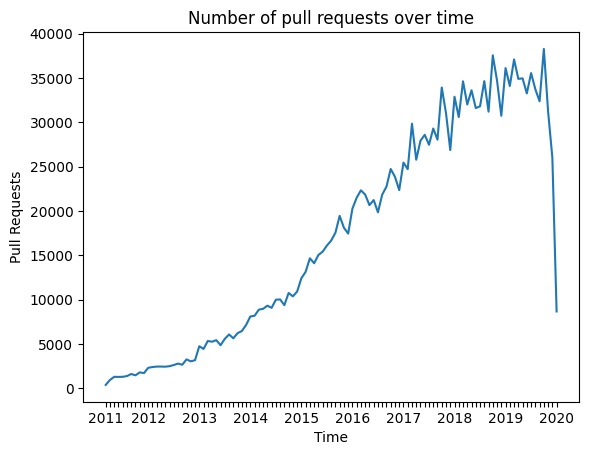

In [129]:
dates = pd.to_datetime(df['Closed At'], format="%Y-%m-%dT%H:%M:%SZ")

pr_count_per_year_month = dates.groupby(
    [dates.dt.year, dates.dt.month]).count()
axs = pr_count_per_year_month.plot(kind="line")

# Fixes x-ticks to be less cluttered.
xticks_years = []
last_year = -1
for (year, _) in pr_count_per_year_month.keys():
    if last_year != year:
        last_year = year
        xticks_years.append(year)
    else:
        xticks_years.append('')
axs.set_xticks(range(len(xticks_years)))
axs.set_xticklabels(xticks_years)

axs.set_xlabel("Time")
axs.set_ylabel("Pull Requests")
axs.set_title("Number of pull requests over time")

output_path = f'{figure_base_path}/demographics/pr_count_per_year_month.png'
safe_save_fig(output_path)

plt.show()


### Pulls per project

percentile=98
percentile_index=19650
Top project count: 402
Pull Requests below 98th percentile: 942229/1829971 (51.489%)



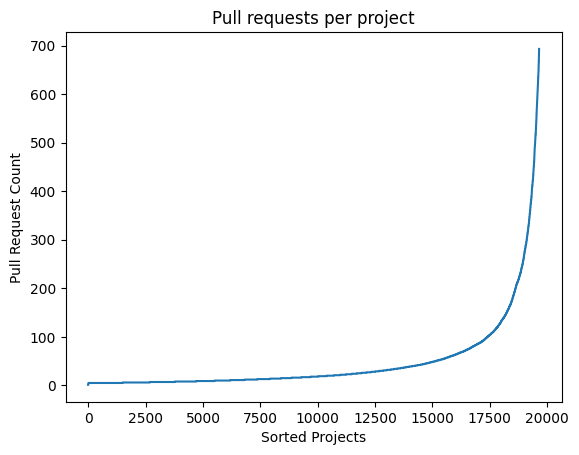

In [130]:
import math 

def __plot(__df, figure_name: str):
    plt.clf()
    axs = __df.plot(kind="line", use_index=False)
    axs.set_xlabel("Sorted Projects")
    axs.set_ylabel("Pull Request Count")
    axs.set_title("Pull requests per project")
    output_path = f'{figure_base_path}/demographics/{figure_name}.png'
    safe_save_fig(output_path)


# all data plot
pr_count_per_project = dates.groupby(df['Project Name']).count()
pr_count_per_project = pr_count_per_project.sort_values()
__plot(pr_count_per_project, "prs_per_project_all")

# up to 97th Percentile plot
project_count = len(pr_count_per_project)
# NOTE: with the 74th percentile the PR counts of the capped
# elite and the rest are approximately equal. The total number
# of entries is then 479.801.
percentile = 98
print(f'{percentile=}')
percentile_index = math.floor(project_count * percentile / 100)
print(f'{percentile_index=}')
print(f'Top project count: {project_count - percentile_index}')
perc_data = pr_count_per_project.iloc[:percentile_index]
__plot(perc_data, f"prs_per_project_up_to_{percentile}th_percentile")

# Printing some stats.
total_pull_count = sum(pr_count_per_project.values)
bottom_pull_count = sum(perc_data.values)
ratio = 100 * bottom_pull_count / total_pull_count
print(f'Pull Requests below {percentile}th percentile: '
      + f'{bottom_pull_count}/{total_pull_count} ({ratio:.03f}%)\n')

# # TODO: Figure out whether a cap should be used.
# pulls_cap = max(perc_data.values)
# capped_top_pulls_count = pulls_cap * (project_count - percentile_index)
# print(f'{pulls_cap=}')
# print(f'{capped_top_pulls_count=}')
# print(f'{bottom_pull_count + capped_top_pulls_count=}')


### Predictor histograms

PullRequestIsMerged
ControlIntegratedBySameUser
ControlPullRequestLifeTimeInMinutes
ControlPullRequestHasComments
ControlNumberOfCommitsInPullRequest
ControlPullRequestHasCommentByExternalUser
ControlHasHashTagInDescription
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRIntegratorToSubmitter-Put)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToSubmitter-Put)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.PRCommenterToCommenter-Put)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToCommenter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToCommenter-Put)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCommenterToSubmitter-In)
FirstOrderDegreeCentrality(PRIntegratorToSubmitter.IssueCom

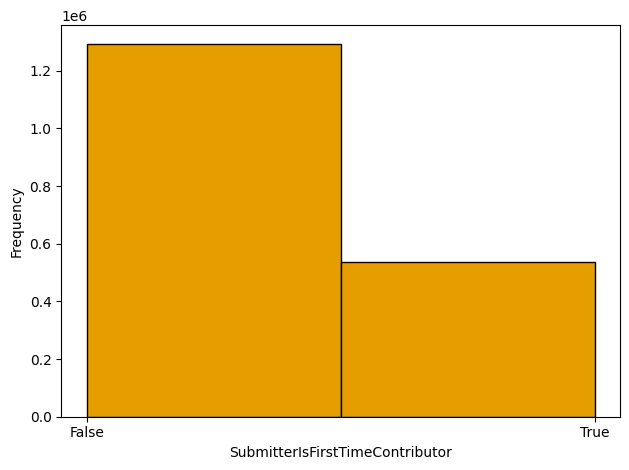

In [131]:
import copy
# shown_fields_without_zeroes = [
#     *log_transformed_fields,
#     *new_log_transformed_fields
# ]
# rx = r'.*(NumberOfCommitsInPullRequest|PullRequestLifeTimeInMinutes).*'
# shown_fields_without_zeroes = set([entry for entry in shown_fields_without_zeroes
#                                    if len(list(re.finditer(rx, entry))) == 0])
# print(f'{shown_fields_without_zeroes=}')

default_plot_settings = {
    'edgecolor': 'black',
    'color': "#e69d00"
}

default_plot_settings_2 = copy.deepcopy(default_plot_settings)
default_plot_settings_2['color'] = "#56b3e9"


def __fix_x_label_fontsize(__column):
    # Adjusts x-label's fontsize to fit the text.
    fig = plt.gcf()
    fig_width = fig.get_figwidth()
    xlabel_fontsize = int(fig_width * 100 / len(__column))
    ax = plt.gca()
    orig_fontsize = ax.xaxis.label.get_fontsize()
    ax.xaxis.label.set_fontsize(min(xlabel_fontsize, orig_fontsize))


def create_histogram(_df: pd.DataFrame, _column: str,
                     subfolder_name: str = "",
                     show_without_zeroes: bool = False):
    can_create_feature_histograms = True

    if not can_create_feature_histograms:
        return

    binary_fields = _df.select_dtypes(exclude='number').columns

    print(_column)
    plt.clf()
    entries = _df[_column]

    if _column in binary_fields:
        entries = _df[_column].replace({False: 0, True: 1})
        plt.xticks([0, 1], ['False', 'True'])
        plt.hist(entries, bins=2, **default_plot_settings)
        plt.ylabel('Frequency')
    # elif __column in shown_fields_without_zeroes:
    elif show_without_zeroes:
        _, bins, _ = plt.hist(entries, bins=30, alpha=1,
                              label="All Data", **default_plot_settings)
        ax: plt.Axes = plt.gca()
        ax.set_ylabel("Frequency")
        ax.set_xlabel(_column)
        __fix_x_label_fontsize(_column)

        filtered_data = _df[_column][_df[_column] != 0]
        ax2 = ax.twinx()

        ax2.hist(filtered_data, bins, alpha=0.5,
                 label='Excl. zeroes', **default_plot_settings_2)
        ax2.set_ylabel("Frequency (x > 0)")
        ax2.set_zorder(10)
        plt.tight_layout()
    else:
        plt.hist(entries, bins=30, **default_plot_settings)
        plt.ylabel('Frequency')

    plt.xlabel(_column)
    __fix_x_label_fontsize(_column)
    plt.tight_layout()

    output_path = f"{figure_base_path}/distributions/{subfolder_name}/{_column}.png"
    safe_save_fig(output_path)


def create_predictor_histograms(__df: pd.DataFrame, subfolder_name: str = ""):
    # Iterate over the columns and generate histograms
    for column in __df.columns[meta_header_count:]:
        create_histogram(__df, column, subfolder_name, show_without_zeroes=True)


create_predictor_histograms(df)


### Histograms Success Rate

IntraProjectSubmitterPullRequestSuccessRate
EcosystemExperienceSubmitterPullRequestSuccessRate
DependencyEcosystemExperienceSubmitterPullRequestSuccessRate
InversedDependencyEcosystemExperienceSubmitterPullRequestSuccessRate


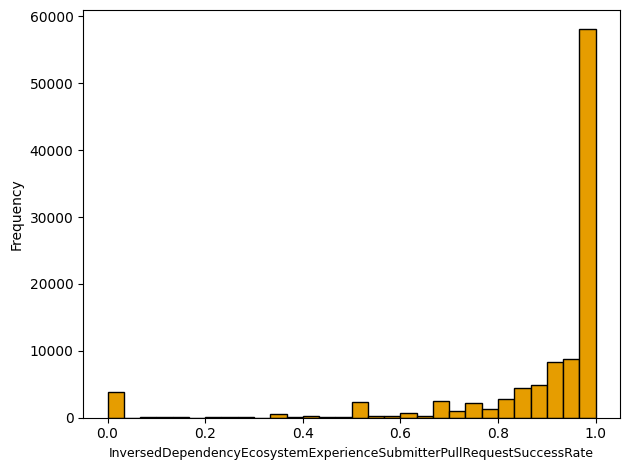

In [132]:
import regex as re

ratio_fields = [field for field in df.columns if len(
    re.findall(r'.*SuccessRate.*', field)) > 0]

for ratio_field in ratio_fields:
    related_count_field = ratio_field[:-len('SuccessRate')] + "SubmissionCount"
    tmp_df = df[df[related_count_field] != 0]
    create_histogram(tmp_df, ratio_field)

## Rare Event Handling

### Predictor Zero Counts

Counts how many fields have partial zero data to see if they are worth including in this study

In [133]:
import regex as re

zeroes = pd.DataFrame()
zeroes['zeroes'] = df.eq(0).sum()
zeroes['non_zeroes'] = len(df) - zeroes['zeroes']
zeroes['percentage_zeroes'] = (zeroes['zeroes'] / len(df)) * 100

binary_fields = df.select_dtypes(exclude='number').columns
ratio_fields = [field for field in df.columns if len(
    re.findall(r'.*SuccessRate.*', field)) > 0]

too_rare_events = []
very_rare_events = []

too_rare_cutoff = 95
rare_cutoff = 70

print(f"Rare events ({rare_cutoff}+% zeroes):")
for name, row_data in zeroes.iterrows():
    # We're only interested in continuous data here.
    if name in binary_fields:
        continue

    # The ratio fields have a meaningful 0.
    if name in ratio_fields:
        continue

    # If none is missing, there's no issue.
    # If all is missing, they're removed by default.
    # It's the partial stuff that's interesting.
    if row_data['percentage_zeroes'] == 0 or row_data['percentage_zeroes'] == 100:
        continue

    if row_data['percentage_zeroes'] > too_rare_cutoff:
        too_rare_events.append(name)
    elif row_data['percentage_zeroes'] > rare_cutoff:
        very_rare_events.append(name)
        print(
            f'{name}: {row_data["zeroes"]:.0f} zeroes, {row_data["non_zeroes"]:.0f} non-zeroes ({row_data["percentage_zeroes"]:.03f}% zeroes).')

print()
print(f'{len(too_rare_events)=}')
print(f'{len(very_rare_events)=}')
print()

print("Non-rare events:")
zeroes_wo_rare = zeroes.drop([*very_rare_events, *too_rare_events])
for name, row_data in zeroes_wo_rare.iterrows():
    if name in binary_fields:
        continue
    if name in ratio_fields:
        continue
    if row_data['percentage_zeroes'] == 0 or row_data['percentage_zeroes'] == 100:
        continue
    print(
        f'{name}: {row_data["zeroes"]:.0f} zeroes, {row_data["non_zeroes"]:.0f} non-zeroes ({row_data["percentage_zeroes"]:.03f}% zeroes).')


Rare events (70+% zeroes):
SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator: 1364361 zeroes, 465610 non-zeroes (74.556% zeroes).
SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter: 1727298 zeroes, 102673 non-zeroes (94.389% zeroes).
DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount: 1622297 zeroes, 207674 non-zeroes (88.652% zeroes).
DependencyEcosystemExperienceSubmitterPullRequestCommentCount: 1651296 zeroes, 178675 non-zeroes (90.236% zeroes).
InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount: 1726627 zeroes, 103344 non-zeroes (94.353% zeroes).
InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount: 1737697 zeroes, 92274 non-zeroes (94.958% zeroes).
DependencyEcosystemExperienceSubmitterIssueSubmissionCount: 1687893 zeroes, 142078 non-zeroes (92.236% zeroes).
DependencyEcosystemExperienceSubmitterIssueCommentCount: 1644653 zeroes, 185318 non-zeroes (89.873% zeroes).
InversedDependencyEcosyst

### Rare Events Handling

Removes fields that are too rare, and binarizes those that are very rare.

bin(SharedExperiencePullRequestSubmittedBySubmitterIntegratedByIntegrator)
bin(SharedExperiencePullRequestSubmittedByIntegratorIntegratedBySubmitter)
bin(DependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)
bin(DependencyEcosystemExperienceSubmitterPullRequestCommentCount)
bin(InversedDependencyEcosystemExperienceSubmitterPullRequestSubmissionCount)
bin(InversedDependencyEcosystemExperienceSubmitterPullRequestCommentCount)
bin(DependencyEcosystemExperienceSubmitterIssueSubmissionCount)
bin(DependencyEcosystemExperienceSubmitterIssueCommentCount)
bin(InversedDependencyEcosystemExperienceSubmitterIssueSubmissionCount)
bin(InversedDependencyEcosystemExperienceSubmitterIssueCommentCount)


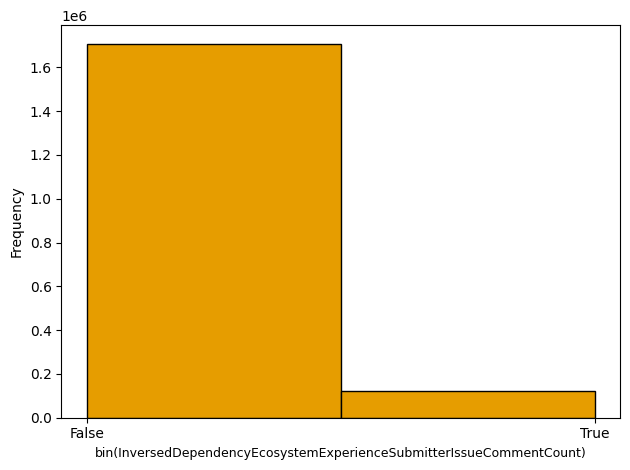

In [134]:
# Too rare events are dropped.
df = df.loc[:, (df != 0).any()]
df = df.drop(too_rare_events, axis=1)

# Very rare events are binarized.
for ratio_field in very_rare_events:
    bin_field_key = f'bin({ratio_field})'
    df[bin_field_key] = df[ratio_field].apply(lambda x: x > 0)
    df = df.drop(ratio_field, axis=1)
    create_histogram(df, bin_field_key)


## Finalization

### Stores processed data file

In [135]:
output_file_name = f'{data_file_name}_v2'
output_path = data_path_format.format(data_file_name=output_file_name)
df.to_csv(output_path)